In [11]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss
from sklearn.mixture import GaussianMixture
import pandas as pd

In [12]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    return(em)

In [13]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

### KIR2DL3

In [18]:
KIR2DL3_data=B['KIR2DL3'].to_numpy()

X=KIR2DL3_data

# Initial Parameters
a=({
    'Mean':1e-8,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':1,
    'Variance':0.01,
    'Weight':1/3
})
em=EMGMM(X,a)


In [19]:
em[-1]

[{'Mean': 0.0026036893983885047,
  'Variance': 3.633102396091944e-05,
  'Weight': 0.12174158390384511},
 {'Mean': 0.6577951232834827,
  'Variance': 0.0006815496846202803,
  'Weight': 0.3695638072521124},
 {'Mean': 1.2526051058616965,
  'Variance': 0.002445214126661055,
  'Weight': 0.5043481138395418}]

In [21]:
t=gauss.findThreshold1(X,gauss.BIC_gmm(X),em)
th=gauss.findThreshold2(X,gauss.BIC_gmm(X),em)
print(t,th)

[0.05564987994391839, 0.862573139130735] [0.12558619068820312, 0.8640289439331263]


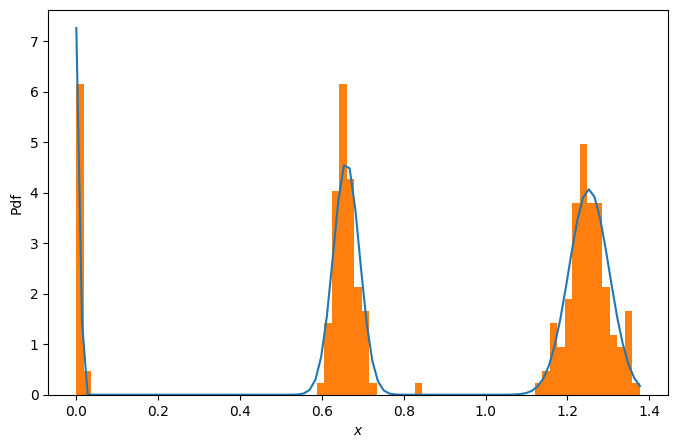

In [9]:
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

# plt.plot(b,pdf1)
plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [8]:

# X = gauss.SimulateGMM(100,1,4,30,2)
X=X.reshape(-1,1)

N = np.arange(1, 11)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_,gm.covariances_,em[-1])

[[0.65987422]
 [1.25260262]
 [0.00260318]] [[[1.04253996e-03]]

 [[2.44620705e-03]]

 [[3.73193437e-05]]] [{'Mean': 0.0026036893983802556, 'Variance': 3.633102396072825e-05, 'Weight': 0.12174158390380435}, {'Mean': 0.6598834864268439, 'Variance': 0.001052739886866364, 'Weight': 0.37392903792641774}, {'Mean': 1.2526051058561316, 'Variance': 0.002445214126032324, 'Weight': 0.5043481136949342}]


### KIR2DP1

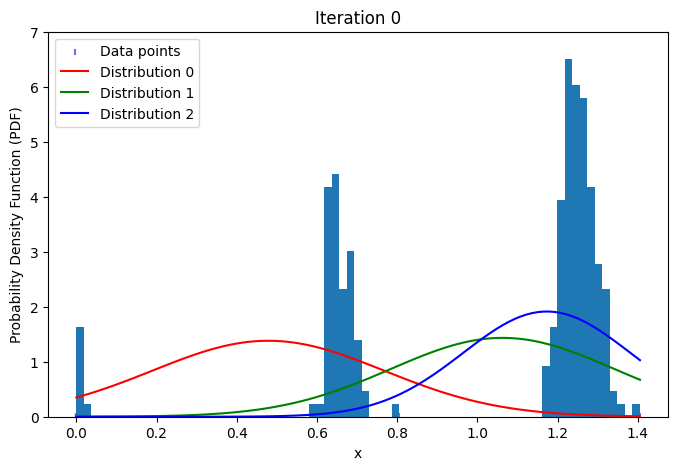

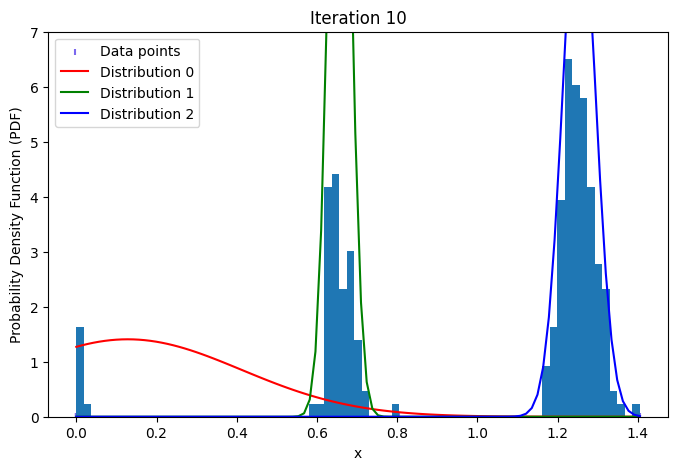

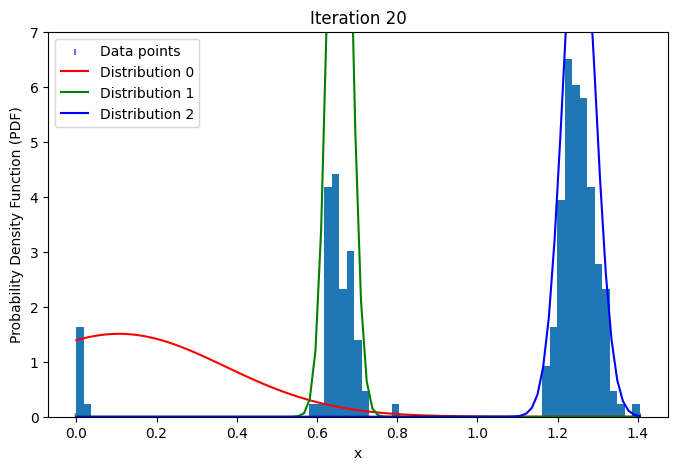

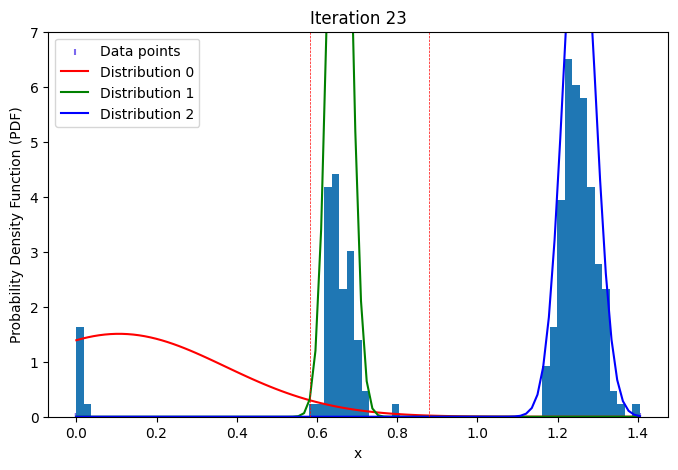

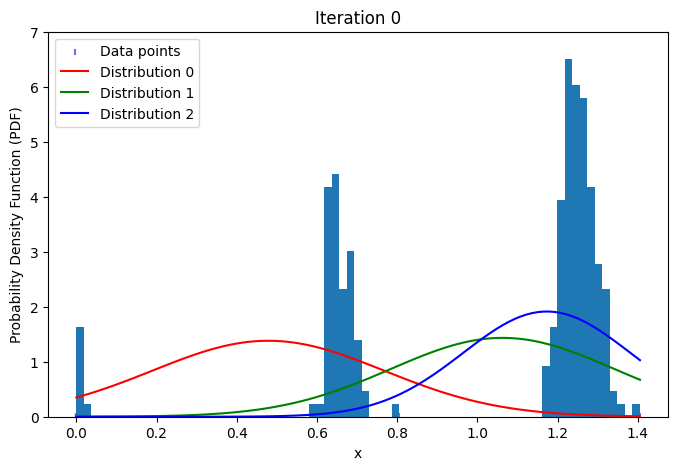

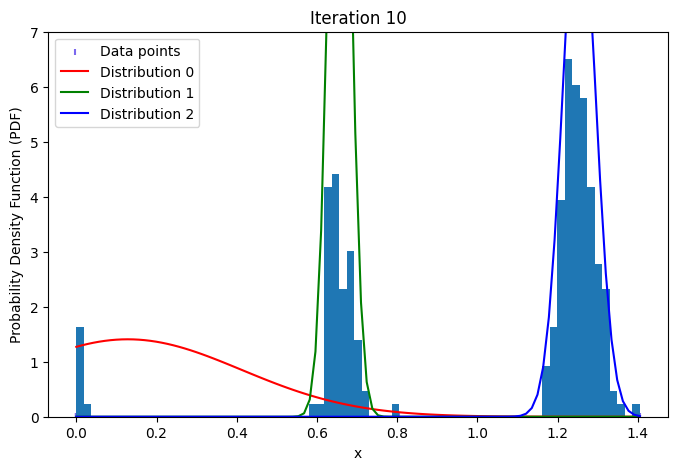

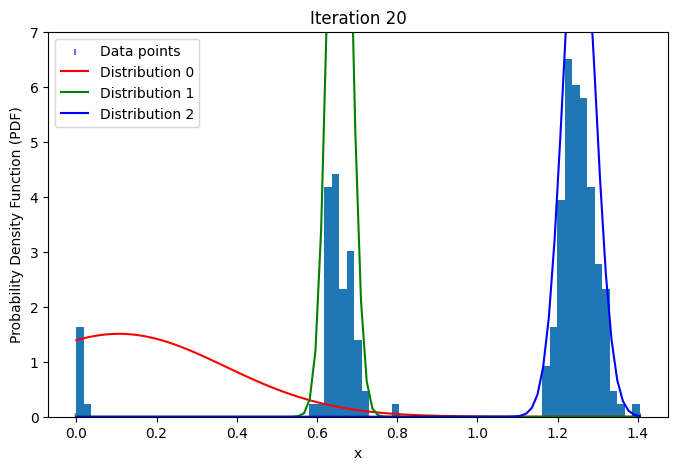

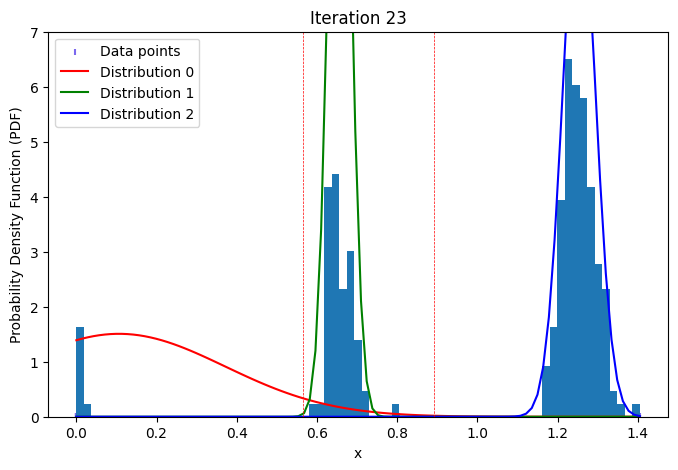

In [10]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iter_data_KIR2DP1=EMGMM(KIR2DP1_data,[])
t=gauss.findThreshold1(KIR2DP1_data,gauss.BIC_gmm(KIR2DP1_data),iter_data_KIR2DP1)
th=gauss.findThreshold2(KIR2DP1_data,gauss.BIC_gmm(KIR2DP1_data),iter_data_KIR2DP1)
gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,t,7)
gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,th,7)

In [15]:
print(t,th)

[0.5819509039400022, 0.880023318153174] [0.5647574257502957, 0.8921287777890455]


In [10]:
X=KIR2DP1_data.reshape(-1,1)

In [11]:
X=X.reshape(-1,1)

N = np.arange(1, 5)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_)
print(gm.covariances_)
print(iter_data_KIR2DP1[-1])

[[1.2533949 ]
 [0.6585849 ]
 [0.00251858]]
[[[1.68914190e-03]]

 [[1.02627074e-03]]

 [[3.96880802e-05]]]
[{'Mean': 0.1062323123133622, 'Variance': 0.07004124680804678, 'Weight': 0.04016898675399033}, {'Mean': 0.6565057233511385, 'Variance': 0.0007246544450363808, 'Weight': 0.3033139515710647}, {'Mean': 1.2533969841889148, 'Variance': 0.001688154858287509, 'Weight': 0.6565210277534098}]


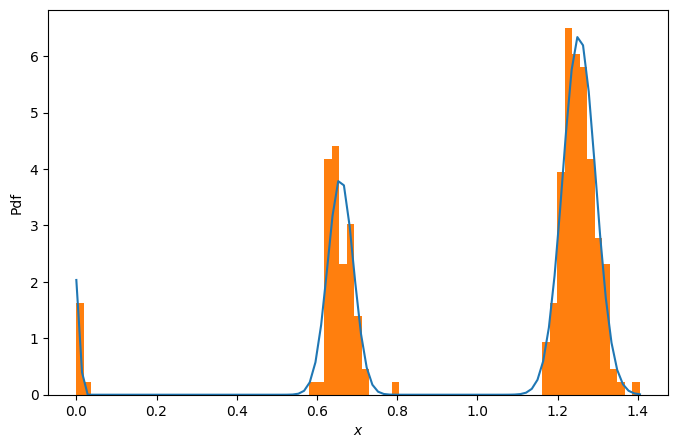

In [11]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

### KIR3DL1

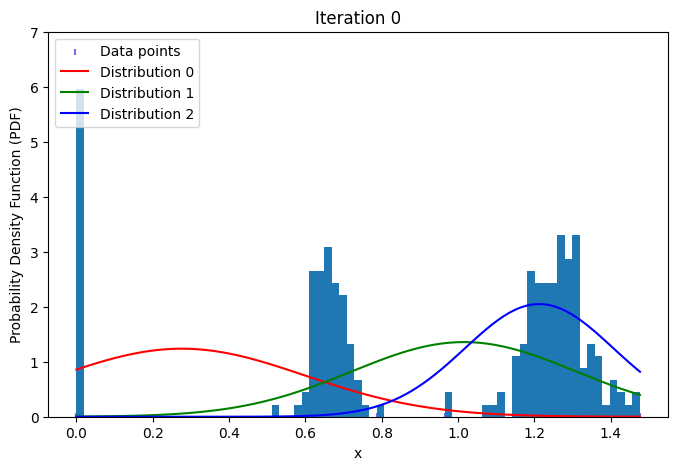

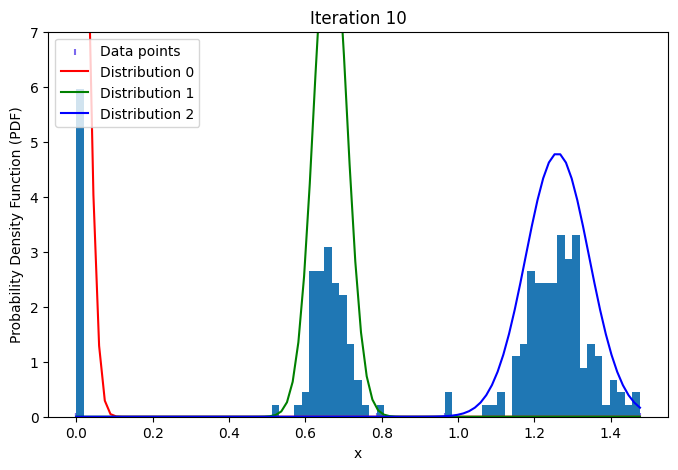

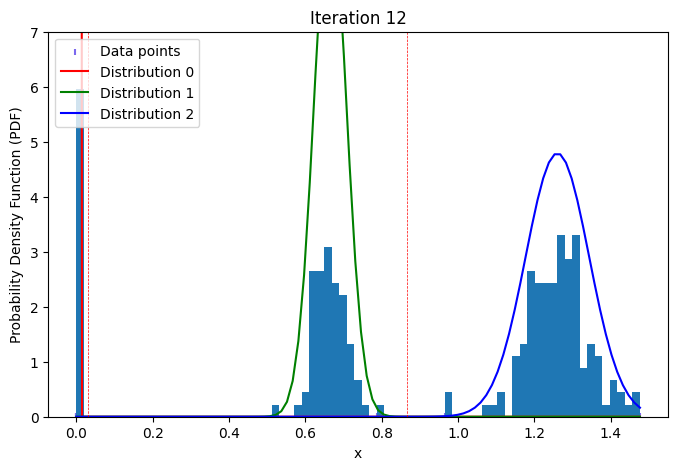

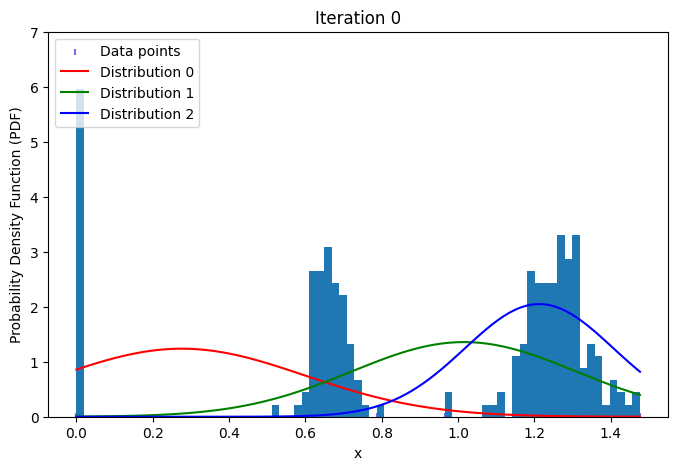

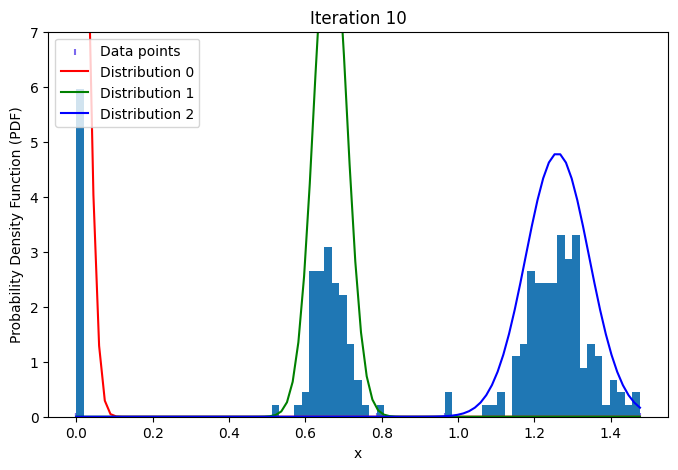

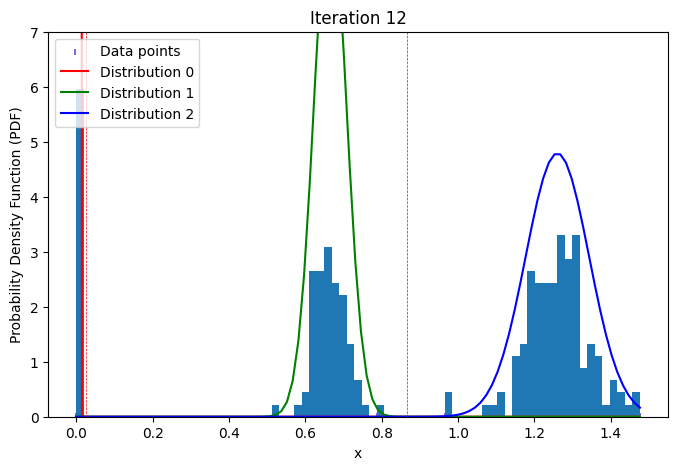

[0.029826126195467272, 0.8649576596685509] [0.026492202761768186, 0.8666725074780344]


In [16]:
KIR3DL1_data=B['KIR3DL1'].to_numpy()

em=EMGMM(KIR3DL1_data,[])
t=gauss.findThreshold1(KIR3DL1_data,gauss.BIC_gmm(KIR3DL1_data),em)
th=gauss.findThreshold2(KIR3DL1_data,gauss.BIC_gmm(KIR3DL1_data),em)
gauss.PlotGMM(KIR3DL1_data,em,10,t,7)
gauss.PlotGMM(KIR3DL1_data,em,10,th,7)
print(t,th)

### KIR2DS3

In [31]:
KIR2DS3_data=B["KIR2DS3"].to_numpy()

In [32]:
def PlotGMM2(X,iteration_data,plotper_iter:int,thresholds,ylimit):
    c=['red','green','blue','magenta']
    gmm_datapoints=np.linspace(np.min(X),np.max(X),100)
    for i in range(len(iteration_data)):
        if i%plotper_iter==0 or i==len(iteration_data)-1:
            #Set figure size, title, and plot the data points
            plt.figure(figsize=(8,5))
            plt.title("Iteration {}".format(i))
            plt.scatter(X, [0.005] * len(X), color='mediumslateblue', s=15, marker="|", label="Data points")
            plt.hist(X,bins=75,density=True)

            #Plot the estimated pdf
            for k in range(len(iteration_data[i])):
                plt.plot(gmm_datapoints, gauss.GaussianPDF(gmm_datapoints, iteration_data[i][k]['Mean'], iteration_data[i][k]['Variance']), color=c[k], label="Distribution {}".format(k))
            
            if ylimit==[]:
                pass
            else:
                plt.ylim(0,ylimit)
                
            #Set the x and y label
            plt.xlabel("x")
            plt.ylabel("Probability Density Function (PDF)")
            plt.legend(loc="upper left")
            
            if i==len(iteration_data)-1:
                for i in range (len(thresholds)):
                    plt.axvline(thresholds[i],c='red',ls='--',lw=0.5)

            plt.show()

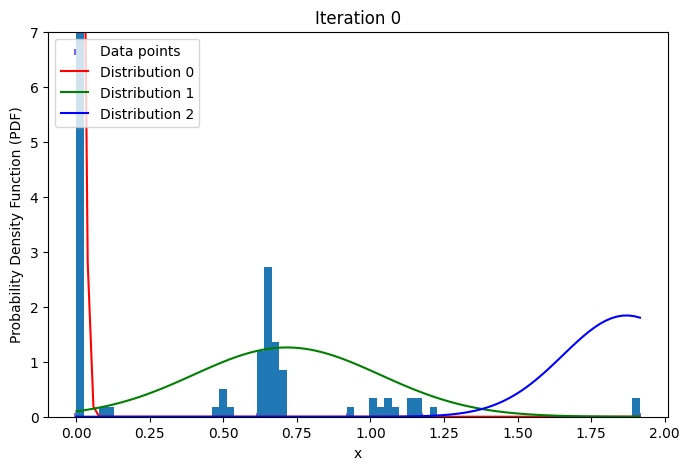

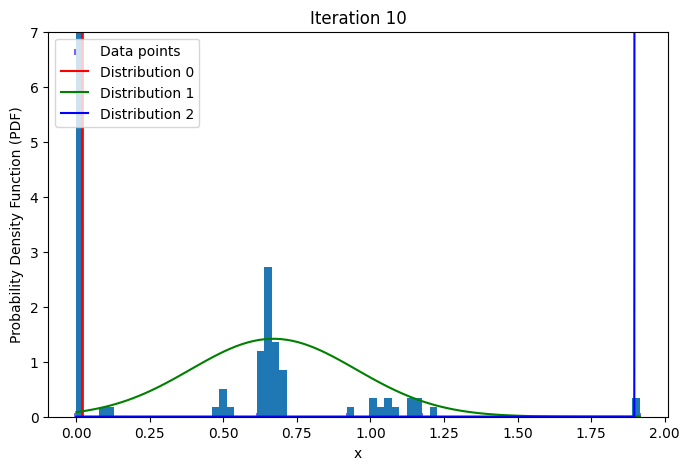

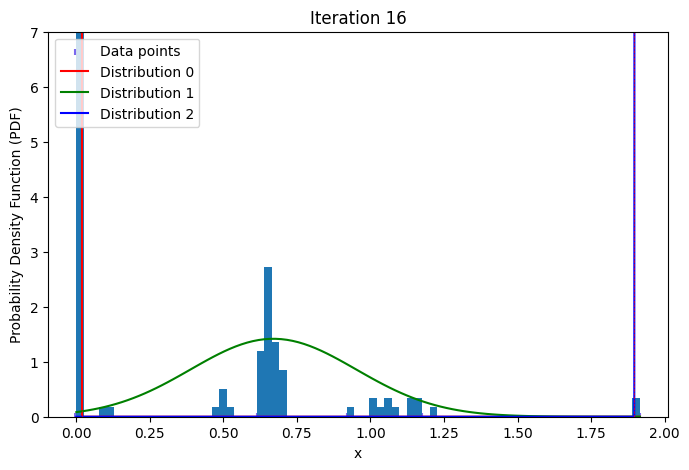

In [51]:
initial=({
    'Mean':0.01,
    'Variance':0.027,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.027,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.027,
    'Weight':1/3
})
iteration_data_KIR2DS3=EMGMM(KIR2DS3_data,initial)
t=gauss.findThreshold(KIR2DS3_data,gauss.BIC_gmm(KIR2DS3_data),iteration_data_KIR2DS3)
PlotGMM2(KIR2DS3_data,iteration_data_KIR2DS3,10,t,7)

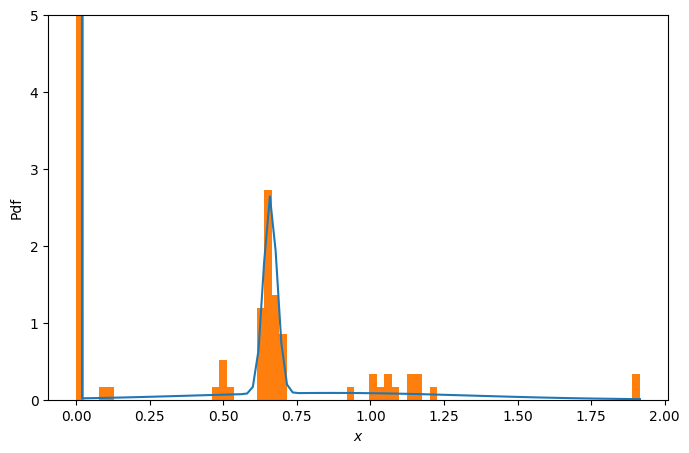

In [49]:
X=KIR2DS3_data.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 6)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
plt.ylim(0,5)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [50]:
np.sort(M_best_BIC.predict(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])